<a href="https://colab.research.google.com/github/Vaibhav-sa30/Primer-For-Deep-Learning-Using-Pytorch/blob/main/Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Image Dataset

In [2]:
import numpy as np
import torch
from torch import tensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

In [3]:
x = tensor([1.0])
w = torch.tensor(-0.5)
b = torch.tensor(1.0, )
z = w*x+b
y = torch.sigmoid(z)
print(z)
print(y)

tensor([0.5000])
tensor([0.6225])


Let's build a simple model


In [4]:
w = torch.tensor(-0.8, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

z = w*x + b
y_hat = torch.sigmoid(z)
print(y_hat)

Loss = 0.5*(y_hat-y)**2

print(Loss)

Loss.backward()

tensor([0.3100], grad_fn=<SigmoidBackward0>)
tensor([0.0488], grad_fn=<MulBackward0>)


In [5]:
w.grad

tensor(-0.0668)

In [6]:
b.grad

tensor(-0.0668)

In [7]:
#True Function
x = tensor([1.0])
w_true = torch.tensor(-0.5)
b_true = torch.tensor(1.0,)
z = w_true*x + b_true
y = torch.sigmoid(z)

#Build a model
w = torch.tensor(-1.8, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)
eta = tensor(1.0)
loss = []

for i in range(10):
  #forward prop
  z = w*x+b
  y_hat = torch.sigmoid(z)


  #compute loss
  L = 0.5*torch.pow((y_hat), 2)
  loss.append(L.item())

  #Backpropp
  L.backward()
  print(w.item())

  #update parameter
  with torch.no_grad():
    w -= eta*w.grad
    b -= eta*b.grad

  #Zero the gradients, otherwise it keeps accumulating
  w.grad.zero_()
  b.grad.zero_()

-1.7999999523162842
-1.8172674179077148
-1.8336174488067627
-1.849137783050537
-1.863904356956482
-1.877983570098877
-1.891433596611023
-1.9043056964874268
-1.9166452884674072
-1.928492784500122


Let's see what are the available datasets

In [8]:
print(dir(torchvision.datasets))

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__', '__doc__', '_

Let's load the first dataset: CIFAR10

In [9]:
transform  = transforms.Compose(
    [transforms.ToTensor(), #Converting image to pytorch tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] #Normalize((#mean), (#var))
)

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)


100%|██████████| 170498071/170498071 [00:02<00:00, 69874509.10it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
print(trainset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
print(trainset.data.shape)

(50000, 32, 32, 3)


In [12]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [13]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

from torch.utils.data import DataLoader

In [14]:
trainloader = DataLoader(trainset, batch_size = 4, shuffle = True)
testloader = DataLoader(testset, batch_size = 4, shuffle = False)


In [15]:
x_train = iter(trainloader)

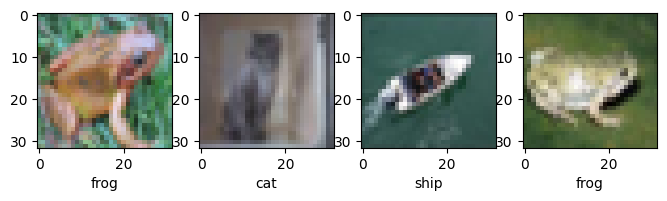

In [16]:
imgs, labels = next(x_train)

fig, ax = plt.subplots(1,4, figsize = (8,10))
i = 0

for img, label in zip(imgs, labels):
  img = img/2 + 0.5
  npimg = img.numpy()
  ax[i].imshow(np.transpose(npimg, (1,2,0)))
  ax[i].set_xlabel(classes[label])
  i += 1

`img = img/2 + 0.5`



1. Normalization: Dividing by 2 scales the pixel values to a range of [0, 0.5]. Then, adding 0.5 shifts this range to [0.5, 1.0]. This normalization is useful because it brings the pixel values into a more appropriate range for many machine learning algorithms. The range [0, 1] is common for images and can help the model converge faster during training.

2. Zero-Centering: By adding 0.5, you effectively shift the pixel values from being centered around 0 (e.g., ranging from -0.5 to 0.5) to being centered around 0.5 (e.g., ranging from 0 to 1). This can help reduce bias and make the data more suitable for certain algorithms, especially if they have activation functions that behave better with positive inputs.

3. Enhancing Contrast: The transformation can also enhance the contrast of the image. Since it stretches the original pixel values, it can make the differences in brightness and color more noticeable.

Overall, this preprocessing step is commonly used to prepare images for machine learning tasks, especially deep learning, as it helps with training stability and performance.

In [17]:
  x_train, y_train  = torch.tensor(trainset.data[:100], dtype = torch.float64), torch.tensor(trainset.targets[:100])

  x_train = x_train/x_train.max()

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
y_train_ohe = F.one_hot(y_train, num_classes = 10).type(torch.float32)

print(y_train[0], y_train_ohe[0])

tensor(6) tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])


In [22]:
class FFN(nn.Module):

  def __init__(self):
    super(FFN, self).__init__()
    self.a1 = nn.Linear(32*32*3, 1024)
    self.a2 = nn.Linear(1024, 10)

  def forward(self, x):
    h1 = torch.relu(self.a1(x.reshape(1, 32*32*3)))
    h2 = self.a2(h1)
    return h2

In [24]:
#Instantiate The Model
model = FFN()

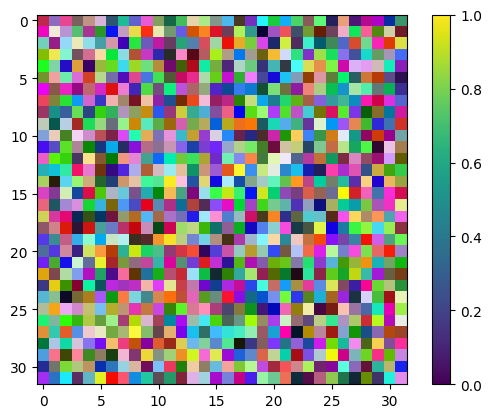

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

w1,b1,w2,b2 = list(model.parameters())
weights = scaler.fit_transform(w1.detach().numpy())
plt.imshow(weights[0,:].reshape(32,32,3))
plt.colorbar()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

In [ ]:
epochs = 30

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.00001, momentum = 0)

def train(x_train, model, optimizer, criterion):
  loss_trace = []
  accuracy = []
  for epoch in range(epochs):
    y_pred = []

    # Forward prop all training samples and accumulate gradients
    for i in range(0, len(x_train)):
      out =  model(x_train[i])
      y_pred.append(torch.argmax(out).item())
      loss = criterion(out, y_train[i, None])

      loss.backward()

      #udpate parameters
      optimizer.step()
      optimizer.zero_grad

    accuracy.append(accuracy_score(y_train, y_pred))
    loss_trace.append(loss.detach().item())
